In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import re
import string
#import unicodedata
#from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import nltk
import spacy
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.corpus import stopwords
stopword_list = stopwords.words('english')

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
#from nltk.tokenize.stanford import StanfordTokenizer


from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

from nltk import ngrams, FreqDist

lemmatizer = WordNetLemmatizer()
tokenizer = ToktokTokenizer()

In [3]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor

In [4]:
# for lasso
from sklearn.linear_model import LassoCV
import time
import sklearn

In [5]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap

In [8]:
stopword_list_new = list(stopword_list)

In [ ]:
# again, some lists of stop words

In [9]:
list_2 =['have_not_test','fit_wardrobe','part_tile','wall_and_base_unit','range_wall',
 'obscure','may','porch','suite_comprise','shower_over','purchase', 'gas_fire',
 'space_and_plumbing', 'potential','seller','panel_bath','brick','breakfast'
 'internal','any_representation_warranty','sink_and_drainer',
 'mixer_tap', 'work_surface','towards', 'under_stair_storage_cupboard',
 'glazing', 'must_verify_the_dimension_carefully','none_rely_upon_statement','prospective_buyer_only','market_this',
 'before_order_carpet','fixture_and_fitting_other','low',
 'would_make','low_flush','detach_bungalow',
 'please','move',
 'white_suite_comprising',
 'shape',
 'workshop',
 'fitting',
 'selection',
 'any_apparatus_equipment_fixture',
 'television_point','block','floor_plan','substantial',
 'extension',
 'pave',
 'half',
 'fitted_wardrobe','wardrobe'
 'time',
 'information',
 'across',
 'approximately',
 'junction',
 'detached',
 'opening',
 'various',
 'efficiency_give_all_measurement',
 'representation_fact_any',
 'than_those_mention_agree','situate_within',
'estate',
 'housing','can_not', 'you_can',
 'electric_fire',
 'it_own',
 'locate_within',
 'choice','build_storage_cupboard','storage_cupboard','air_cupboard',
 'share','walk_distance','within_walk_distance','easy_access','within_easy_reach','family_bathroom','master_bedroom','master',
 'guide_price',
 'serve',
 'internally',
 'advise_that_some',
 'require_clarification_further_information',
 'not_precise_please',
 'particular_may_await',
 'vendor_approval_you',
 'period',
 'buy',
 'open_onto',
 'please_contact_especially_you', 'you_will_find',
 'have_take_guide',
 'variety',
 'step','slide_door','detach_family','viewing',
 'quality',
 'drainer',
 'stun',
 'gas_hob',
 'entrance_porch', 'cupboard_housing',
 'offering',
 'ensuite',
 'detail',
 'lane','velux_window', 'can_find', 'approximate','place',
 'building','cottage','sit',
 'base',
 'stone', 'call',
 'make_our_sale_particular',
 'present',
 'way',
 'enclosed',
 'power',
 'incorporate',
 'staircase','create',
 'space_for_fridge_freezer',
 'sink_unit',
 'stainless_steel_sink',
 'gate','any_point','three_piece','internal','fully']

In [10]:
update_extend_list=[ 'roof', 'guarantee_their_operating_ability','limit_nor_any', 'service_system_and_appliance_list', 'any_built_furniture',
 'size_only_intend','general_guidance_you','price','resident','externally_there','currently','this_specification','top','you_will',
 'it_employee_agent','stair_rise', 'range_base', 'hob', 'without', 'first_time_buyer', 'away', 'suite_comprising', 'together',
 'offer_for_sale', 'beautifully_present', 'extractor', 'shelving','offer_purchase_these', 'secure', 'high',
 'but_not_constitute','matter_refer_these_particular','whatever_relation_this','would_ask_for_your_operation', 'sash_window', 'would','require','system', 'picture_rail','have_any_authority', 'match', 'lead_out',
 'make_give',
 'which_particular_importance',
 'sell', 'bedroom_semi_detached','third',
 'heart',
 'integrate',
 'right',
 'useful',
 'one_and_half_bowl',
 'glass',
 'drawer',
 'tile_splash_back',
 'power_and_light',
 'guest',
 'any_contract',
 'you_please_contact',
 'order_that_there',
 'agent',
 'will_delay_agree',
 'mature',
 'office_and_will',
 'identification_documentation_late_stage', 'corner','purchaser_will_ask_produce',
 'opaque',
 'particular_issue_good_faith', 'any_offer_contract',
 'property_accordingly_strongly',
 'any_the_equipment_appliance',
 'report_before_finalise_their', 'their_own_survey_service',
 'service_please_note',
 'please_check_the_position',
 'you_especially_you_contemplate', 'should_independently_verify_prospective',
 'advise_prospective_buyer_commission']

In [11]:
extended_stopwords = ['bedroom', 'property', 'door', 'rear', 'front', 'two',
       'window', 'kitchen', 'double', 'room', 'area',
       'bathroom', 'upvc_double_glaze', 'large', 'offer', 'side', 'access',
       'window_front', 'space', 'lead', 'also',
       'double_glaze_window', 'include', 'three', 'home',
       'floor', 'house', 'fit', 'aspect', 'one', 'provide', 'feature', 'unit', 'dining_room',
       'open', 'upvc', 'window_side', 'suite', 'road', 'wall', 'door_lead', 'double_glazed', 'well', 'benefit',
       'view', 'light', 'bedroom_one', 'range', 'outside',
       'first_floor', 'storage', 'living_room',
        'separate', 'locate', 'double_glaze',
        'shower_room', 'point', 'private',
        'throughout',
       'accommodation', 'single', 'family', 'ground_floor', 'close',
       'power_point', 'build', 'bay_window', 'apartment', 
       'hallway', 'family_home', 'within', 'front_aspect',
       'entrance_hall', 'rear_elevation', 'location', 'shower',
        
        'four', 'situate', 'set',
        'development', 'wall_mount',
        'enclose', 'living', 'find', 
       'din_room', 'via', 'surround', 'electric', 'build_wardrobe', 'back', 'property_benefit',
       'utility', 'four_bedroom', 'comprise', 'along', 
       'new', 'main', 'flooring', 'boast', 'fit_kitchen', 'extend', 'suite_shower', 'entrance',
       'plus', 'landing', 'level', 'two_double_glaze',
       'second', 'study', 'hall',
       'ceiling', 'downstairs', 'well_present', 'overlook', 'local',
       'give_access', 'patio_door',
       'additional', 'kitchen_breakfast','mile',
      'fit_carpet', 'make', 'look', 'centre',
       'service', 'entrance_door',
       'bedroom_double_glaze', 'kitchen_diner', 'onto', 'tile_floor',
       'available', 'white', 'whilst', 'face', 'part',
       'stair', 'fitted', 'flat',
       
        'stair_first_floor', 'provide_access', 'panel',
       'side_aspect',  'radiator_double_glaze', 'station', 'sit_room',
       'amenity', 'second_floor',
        'modern_fit', 'front_elevation', 
        'far', 'wall_base_unit',
       'double_glazing', 'complete', 'bay', 'sale',
       'family_room', 'bath', 'inset', 'use', 'size',
       'many', 'street', 'impressive', 'range_wall_base', 'rail',
        'loft_access', 'detach', 'max_max', 'car',
       'also_benefit', 'give', 'office', 'externally', 
       'drive', 'built', 'max', 
       'window_overlook', 'link', 'sink', 'first_floor_landing',
       'glaze_window', 'reception', 'heating', 'fit_range',
       'chain', 'lounge_din',  'recess', 'appliance', 'border',
       'low_level', 'finish', 'land', 'bed', 'store', 
        'facility',
       'built_wardrobe',  'hand_basin', 'stair_lead',
        'upstairs', 'ground', 'market', 'coving', 'addition',
       'lighting', 'buyer', 'position', 
       'furniture']

In [12]:
real_estate_stopwords = [
    "area",
    
    "location",
    "plot",
    "hectare",
    "m²",
    "m2",
    "sq",
    "sale",
    "square",
    "meter",
    "bedroom",
    "bathroom",
    "room",
    "living",
    "kitchen",
    "hallway",
    "corridor",
    "dining",
    "apartment",
    "flat",
    "double",
    "two",
    "three",
    "property","also","include","four",
    'door', 'window', 'side', 'home', 'house', 'max_max', 'bungalow',
    'rear', 'front', 'floor', 'aspect', 'unit', 'well', 'within', 'whilst', 'access_via', 'ask_operation_order_delay','check_position_especially_contemplate'
    ,'documentation_late_stage_would','first_floor_three','first','lounge_double_glaze','low_level_wash_hand','max_max_max_max','need','number',
    'please_contact_office_please','point_particular_importance','purchaser_ask_produce_identification','side_elevation','take','three_bedroom',
    'three_double_glaze','upvc_double_glazing','vinyl_flooring','year','window_face','wash_hand_basin','telephone_point','tap','strongly_advise_prospective_buyer',
    'stage_would_ask_operation','room_size_intend','regulation_intend_purchaser_ask', 'representation_fact_form_part','produce_identification_documentation_late',
    'property_measurement_approximate','particular_independently_verify_prospective','offer_contract_matter_refer','make_give_representation_warranty',
    'limit_employee_agent_authority','general_guidance_must_verify','full','fully_enclose', 'fully_fit','fixture_fitting_mention_agree','finalise_offer_purchase_particular',
    'equipment_appliance_property_accordingly', 'equipment_fixture_fitting_service','come', 'commission_survey_service_report','comprises',
 'comprising', 'connect','continue','could','cover','buyer_tenant_neither_sequence','access_loft', 'accommodation_comprise', 'accommodation_comprises','adjacent',
 'allow', 'amenity_include','another','approx', 'around','base_unit', 'base_wall','benefit_include', 'beyond','extensive','external','end','five','live',
 'live_room','there_also','upvc_double','benefit_from','glaze','nearby','glazed','shed','lounge_diner','travel_some_distance_view','heat_towel_rail'
    ]+extended_stopwords+update_extend_list+list_2

In [13]:
stopword_list_new.extend(real_estate_stopwords)

In [14]:
len(stopword_list_new)

726

In [15]:
def word_cloud(data):
    text = " ".join(review for review in data)
    print ("There are {} words in the combination of all review.".format(len(text)))
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopword_list_new, background_color="white",max_font_size=65,width=800,height=400).generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [15]:
def find_text_feature(data):
    corpus = data.tri_gram_replaced.fillna(' ').values
    # make the doc-term matrix
    tfidf = TfidfVectorizer(max_df=.985, min_df=0.025, stop_words=stopword_list_new,use_idf=True, ngram_range=(1,1), norm=None, max_features=100)
    # Fit and Transform the documents
    matrix = tfidf.fit_transform(corpus)  
    matrix_as_array = matrix.toarray()
    #matrix_as_array.shape
    table_tfidf = pd.DataFrame(matrix_as_array,
                        columns=tfidf.get_feature_names())
    return table_tfidf

In [43]:

from wordcloud import (WordCloud, get_single_color_func, STOPWORDS)
class GroupedColorFunc(object):
    """
    Uses different colors for different groups of words. 
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)
        return self.get_color_func(word)(word, **kwargs)
    
    # Define functions to select a hue of colors arounf: grey, red and green
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(30, 50)

def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(100, 100%%, %d%%)" % random.randint(20, 40)

In [44]:
def plot_pos_neg_wordclouds(neg_ngrams_sort, pos_ngrams_sort):
    fig = plt.figure(figsize=(16,12))
    plt.subplot(121)

    wc1 = WordCloud(width=800, height=400, background_color="white", max_words=20, min_font_size=8)\
                    .generate_from_frequencies(neg_ngrams_sort)

    plt.imshow(wc1.recolor(color_func=red_color_func, random_state=3),
               interpolation="bilinear")
    axis("off")

    wc2 = WordCloud(width=800, height=400, background_color="white", max_words=20, min_font_size=8)\
                .generate_from_frequencies(pos_ngrams_sort)

    plt.subplot(122)

    plt.imshow(wc2.recolor(color_func=green_color_func, random_state=3),
               interpolation="bilinear")
    axis("off")
    show()

In [107]:
def plot_allwords_wordclouds(norm_freqs_all,uniq_pos_ngrs,uniq_neg_ngrs):


    wc = WordCloud(width=1200, height=800, background_color="white", max_words=100, min_font_size=10)\
                    .generate_from_frequencies(norm_freqs_all)

    color_to_words = {
        # words below will be colored with a green single color function
        '#00ff00': uniq_pos_ngrs.keys(),
        # will be colored with a red single color function
        'red': uniq_neg_ngrs.keys()
    }

    # Words that are not in any of the color_to_words values
    # will be colored with a grey single color function
    default_color = 'grey'

   
    # Create a color function with multiple tones
    grouped_color_func = GroupedColorFunc(color_to_words, default_color)

    # Apply our color function
    wc.recolor(color_func=grouped_color_func)

    plt.figure(figsize=(12,10))

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [105]:
# function for plot text features in a wordcloud picture 

def lasso_and_plot_proprertytype(list_useless_type, table_tfidf, UK_2019sale_month67_type,type):
    text_feature_type = table_tfidf.drop(columns=list_useless_type)
    type_concatenated = pd.concat([UK_2019sale_month67_type, text_feature_type], axis=1)
    #type_concatenated = pd.get_dummies(type_concatenated,columns=['property_type'])
    list_region = [i for i in type_concatenated.columns.values.tolist() if 'nuts118nm_' in i]
    list_region.remove('nuts118nm_North East (England)')
    
    X_lasso_all = type_concatenated[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max','len_description']
       +list_region+text_feature_type.columns.values.tolist()]
    X_lasso_all = sm.add_constant(X_lasso_all)
    Y_lasso_all = type_concatenated['log_price_last']
    
    #X_lasso, test_x, Y_lasso, test_y = train_test_split(X_lasso_all, Y_lasso_all, test_size=0.6,random_state=42)
    
    
    list_alphas = [.001,.01,.1,1,10]
    start_time = time.time()
    lasso_cv = LassoCV(cv=10,alphas=list_alphas ).fit(X_lasso_all,Y_lasso_all)
    df_coef_lasso = pd.DataFrame({"var": X_lasso_all.columns.values, "coef":lasso_cv.coef_})
    
    df_coef_lasso_all_text = df_coef_lasso[df_coef_lasso['var'].isin(text_feature_type.columns.values.tolist())]#.sort_values(by='coef',key=abs, ascending=True).head(10)
    # & (((df_coef_lasso['coef']>0.005) | (df_coef_lasso['coef']<-0.005)))
    df_coef_lasso_all_text['coef_abs'] = df_coef_lasso_all_text.coef.abs()
    df_coef_lasso_positive_text = df_coef_lasso_all_text[df_coef_lasso_all_text.coef>0]
    df_coef_lasso_negative_text = df_coef_lasso_all_text[df_coef_lasso_all_text.coef<0]
#     df_coef_lasso_negative_text.coef1 = df_coef_lasso_negative_text.coef*(-1) 

    dict_all = df_coef_lasso_all_text.set_index('var').to_dict()['coef_abs']
    dict_pos = df_coef_lasso_positive_text.set_index('var').to_dict()['coef']
    dict_neg = df_coef_lasso_negative_text.set_index('var').to_dict()['coef']
    
    plot_allwords_wordclouds(dict_all,dict_pos,dict_neg)

    


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-101-07eff4938514>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coef_lasso_all_text['coef_abs'] = df_coef_lasso_all_text.coef.abs()


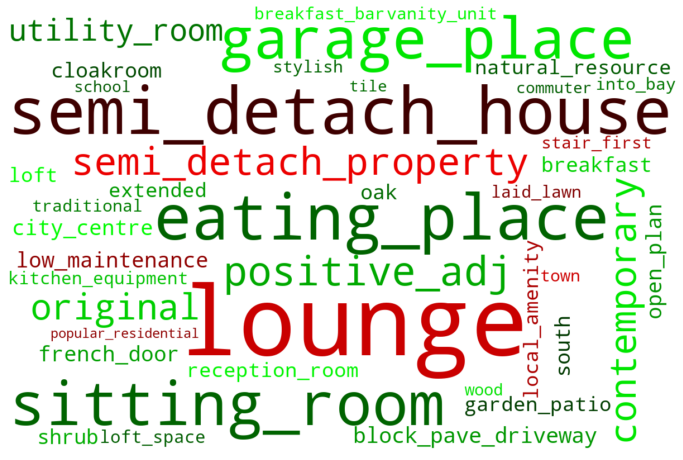

In [102]:
lasso_and_plot_proprertytype(list_useless_Semi_detached,table_tfidf_Semi_detached,UK_2019sale_month67_Semi_detached,'Semi_detached')

In [66]:
df

In [109]:
# LASSO model for only structured data, the location variable is the name of the region

def lasso_train_test_propertytype_1(list_useless_type, table_tfidf, UK_2019sale_month67_type):
    text_feature_type = table_tfidf.drop(columns=list_useless_type)
    type_concatenated = pd.concat([UK_2019sale_month67_type, text_feature_type], axis=1)
    #type_concatenated = pd.get_dummies(type_concatenated,columns=['property_type'])
    list_region = [i for i in type_concatenated.columns.values.tolist() if 'nuts118nm_' in i]
    list_region.remove('nuts118nm_North East (England)')
    
    X_lasso = type_concatenated[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max','len_description']
       +list_region]
    X_lasso = sm.add_constant(X_lasso)
    Y_lasso = type_concatenated['log_price_last']
    
    train_x, test_x, train_y, test_y = train_test_split(X_lasso, Y_lasso, test_size=0.6,random_state=42)
    
    
    list_alphas = [0.000001,0.00001,0.0001,.001,.01,.1,1,10]
    start_time = time.time()
    lasso_cv = LassoCV(cv=10, alphas=list_alphas).fit(train_x,train_y)
    fit_time = time.time() - start_time
    
    # increase the max_iter to guarantee convergence
    lasso_model = sklearn.linear_model.Lasso(normalize=True, alpha = lasso_cv.alpha_)
    lasso_model.fit(X=train_x, y=train_y)
    pred_train_y = lasso_model.predict(train_x)
    pred_test_y = lasso_model.predict(test_x)
    #print('lasso_model.score: ',lasso_model.score(X_lasso, Y_lasso))
    
    print('R2 on the training data: ',r2_score(train_y, pred_train_y))
    print('RMSE on the training data: ',mean_squared_error(train_y,pred_train_y,squared=False))
    
    print('R2 on the test data: ',r2_score(test_y, pred_test_y))
    print('RMSE on the test data: ',mean_squared_error(test_y,pred_test_y,squared=False))

In [ ]:
# LASSO model for only structured data, the location variable is the name of the local authority

def lasso_train_test_propertytype_2(list_useless_type, table_tfidf, UK_2019sale_month67_type):
    text_feature_type = table_tfidf.drop(columns=list_useless_type)
    type_concatenated = pd.concat([UK_2019sale_month67_type, text_feature_type], axis=1)
    type_concatenated = pd.get_dummies(type_concatenated,columns=['lad20nm'])
#     list_region = [i for i in type_concatenated.columns.values.tolist() if 'nuts118nm_' in i]
#     list_region.remove('nuts118nm_North East (England)')
    list_LA = [i for i in type_concatenated.columns.values.tolist() if 'lad20nm_' in i]
    list_LA.remove('lad20nm_Leeds')
    
    X_lasso = type_concatenated[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max','len_description']
       +list_LA]#+text_feature_type.columns.values.tolist()
    X_lasso = sm.add_constant(X_lasso)
    Y_lasso = type_concatenated['log_price_last']
    
    train_x, test_x, train_y, test_y = train_test_split(X_lasso, Y_lasso, test_size=0.6,random_state=42)
    
    
    list_alphas = [0.000001,0.00001,0.0001,.001,.01,.1,1,10]
    start_time = time.time()
    lasso_cv = LassoCV(cv=10, alphas=list_alphas).fit(train_x,train_y)
    fit_time = time.time() - start_time
    
    # increase the max_iter to guarantee convergence
    lasso_model = sklearn.linear_model.Lasso(normalize=True, alpha = lasso_cv.alpha_)
    lasso_model.fit(X=train_x, y=train_y)
    pred_train_y = lasso_model.predict(train_x)
    pred_test_y = lasso_model.predict(test_x)
    #print('lasso_model.score: ',lasso_model.score(X_lasso, Y_lasso))
    
    print('R2 on the training data: ',r2_score(train_y, pred_train_y))
    print('RMSE on the training data: ',mean_squared_error(train_y,pred_train_y,squared=False))
    
    print('R2 on the test data: ',r2_score(test_y, pred_test_y))
    print('RMSE on the test data: ',mean_squared_error(test_y,pred_test_y,squared=False))

In [180]:
# LASSO model for structured data and text features

def lasso_train_test_propertytype_3(list_useless_type, table_tfidf, UK_2019sale_month67_type, type):
    text_feature_type = table_tfidf.drop(columns=list_useless_type)
    type_concatenated = pd.concat([UK_2019sale_month67_type, text_feature_type], axis=1)
    type_concatenated = pd.get_dummies(type_concatenated,columns=['lad20nm'])
#     list_region = [i for i in type_concatenated.columns.values.tolist() if 'nuts118nm_' in i]
#     list_region.remove('nuts118nm_North East (England)')
    list_LA = [i for i in type_concatenated.columns.values.tolist() if 'lad20nm_' in i]
    list_LA.remove('lad20nm_Leeds')
    
    X_lasso = type_concatenated[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max','len_description']
       +list_LA+text_feature_type.columns.values.tolist()]
    X_lasso = sm.add_constant(X_lasso)
    Y_lasso = type_concatenated['log_price_last']
    
    train_x, test_x, train_y, test_y = train_test_split(X_lasso, Y_lasso, test_size=0.6,random_state=42)
    
    
    list_alphas = [0.000001,0.00001,0.0001,.001,.01,.1,1,10]
    start_time = time.time()
    lasso_cv = LassoCV(cv=10, alphas=list_alphas).fit(train_x,train_y)
    fit_time = time.time() - start_time
    
    # increase the max_iter to guarantee convergence
    lasso_model = sklearn.linear_model.Lasso(normalize=True, alpha = lasso_cv.alpha_)
    lasso_model.fit(X=train_x, y=train_y)
    pred_train_y = lasso_model.predict(train_x)
    pred_test_y = lasso_model.predict(test_x)
    #print('lasso_model.score: ',lasso_model.score(X_lasso, Y_lasso))
    
    print('R2 on the training data: ',r2_score(train_y, pred_train_y))
    print('RMSE on the training data: ',mean_squared_error(train_y,pred_train_y,squared=False))
    
    print('R2 on the test data: ',r2_score(test_y, pred_test_y))
    print('RMSE on the test data: ',mean_squared_error(test_y,pred_test_y,squared=False))
    
#     fig, axs = plt.subplots(1, 2,figsize=(10,5))
#     #figsize=(15, 15)
#     #plt.figure(figsize=(6, 6))
#     #plt.figure() 
#     axs[0][0].scatter(pred_train_y, (pred_train_y - train_y), c='b')
#     axs[0][0].title.set_text('Residual vs Fitted plot for '+type)
    
    
#     #plt.figure() 
#     axs[1][0].hist((pred_train_y - train_y),bins=20)
#     axs[1][0].title.set_text('Residual distribution for '+type)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
    ax1.scatter(pred_train_y, (pred_train_y - train_y), c='b')
    ax1.title.set_text('Residual vs Fitted plot for '+type)
    ax2.hist((pred_train_y - train_y),bins=50)
    ax2.title.set_text('Residual distribution for '+type)

# Semi-detached

In [ ]:
UK_2019sale_month67_Semi_detached = pd.read_csv('data_propertytype/property_type_Semi-detached house.csv')

In [ ]:
table_tfidf_Semi_detached = find_text_feature(UK_2019sale_month67_Semi_detached)

In [ ]:
table_tfidf_Semi_detached.sum().sort_values(ascending=False).index.tolist()

In [ ]:
list_useless_Semi_detached = ['corner_plot','downstairs_cloakroom','work','semi_detach_home','semi_detach', 'walk','park','din']

In [125]:
lasso_train_test_propertytype_1(list_useless_Semi_detached,table_tfidf_Semi_detached,UK_2019sale_month67_Semi_detached)

R2 on the training data:  0.656261217448984
RMSE on the training data:  0.33133699157962493
R2 on the test data:  0.6564335112283942
RMSE on the test data:  0.33567755214330514


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [129]:
lasso_train_test_propertytype_1_test(list_useless_Semi_detached,table_tfidf_Semi_detached,UK_2019sale_month67_Semi_detached)

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.657281295312613
RMSE on the training data:  0.3308449891135909
R2 on the test data:  0.657517079535663
RMSE on the test data:  0.33514779034745384


In [89]:
lasso_train_test_propertytype_2(list_useless_Semi_detached,table_tfidf_Semi_detached,UK_2019sale_month67_Semi_detached)

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.7822095972868617
RMSE on the training data:  0.2637394076466961
R2 on the test data:  0.7745949604146933
RMSE on the test data:  0.27189342918075254


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.8080804707807486
RMSE on the training data:  0.24757981967159262
R2 on the test data:  0.8007984880188523
RMSE on the test data:  0.25560139311241925


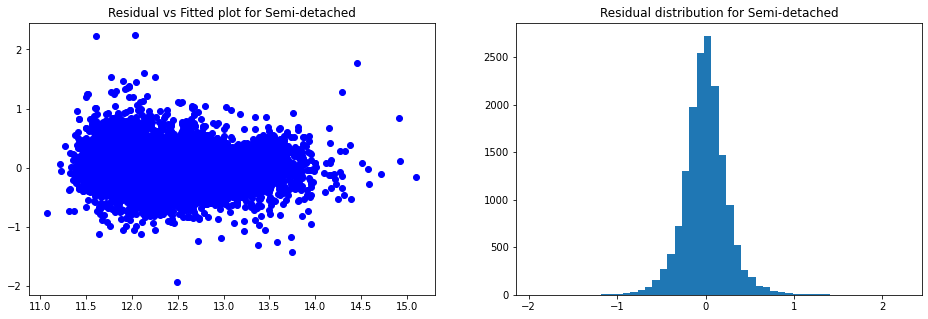

In [181]:
lasso_train_test_propertytype_3(list_useless_Semi_detached,table_tfidf_Semi_detached,UK_2019sale_month67_Semi_detached,'Semi-detached')

## GWR

In [157]:
UK_2019sale_month67_Semi_detached_sample = Semi_detached_concatenated.sample(5000,random_state=42)

In [158]:
coords_Semi_detached = list(zip(UK_2019sale_month67_Semi_detached_sample.lon,UK_2019sale_month67_Semi_detached_sample.lat_left))

In [144]:
coords_Semi_detached

[(-2.903182, 57.696327),
 (-2.1752740000000004, 57.15342),
 (-2.813528, 57.67609399999999),
 (-2.371277, 57.296825),
 (-2.139282, 57.072178),
 (-2.1259, 57.065630000000006),
 (-2.160425, 57.1712),
 (-2.159927, 57.166897),
 (-2.182414, 57.20367),
 (-2.185328, 57.203754),
 (-2.182347, 57.18671),
 (-2.244012, 57.302807),
 (-2.187459, 57.176857),
 (-2.132529, 57.180943000000006),
 (-2.131387, 57.180824),
 (-2.11408, 57.152584),
 (-3.20778, 57.531837),
 (-3.270701, 57.45425),
 (-3.309511, 57.458263),
 (-3.309511, 57.458263),
 (-3.224389, 57.444862),
 (-2.211872, 57.450836),
 (-2.078379, 57.362946),
 (-1.797017, 57.504192),
 (-1.915743, 57.60043),
 (-2.491906, 57.67085600000001),
 (-2.692559, 57.684216000000006),
 (-2.6885830000000004, 57.684147),
 (-2.332625, 57.672077),
 (-2.748363, 57.67972),
 (-2.371277, 57.296825),
 (-2.371277, 57.296825),
 (-2.964888, 57.54614300000001),
 (-3.022732, 57.48599),
 (-2.949143, 57.5594),
 (-2.949187, 57.53668),
 (-2.973786, 57.667274),
 (-2.969062, 57.6768

In [159]:
Y_gwr_values = UK_2019sale_month67_Semi_detached_sample['log_price_last'].values.reshape((-1,1))

In [160]:
Y_gwr_values.shape

(5000, 1)

In [165]:
X_gwr = UK_2019sale_month67_Semi_detached_sample[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max','len_description']
       +text_feature_Semi_detached.columns.values.tolist()]

In [166]:
X_gwr_values = X_gwr.values

In [269]:
X_gwr_values.shape

(5000, 99)

In [167]:
%%time
gwr_selector = Sel_BW(coords_Semi_detached, Y_gwr_values, X_gwr_values)

Wall time: 1.99 ms


In [168]:
%%time
gwr_bw = gwr_selector.search()

Wall time: 12min 34s


In [279]:
gwr_bw

1481.0

In [169]:
%%time
gwr_results = GWR(coords_Semi_detached, Y_gwr_values, X_gwr_values, gwr_bw).fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                5000
Number of covariates:                                                   100

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            960.485
Log-likelihood:                                                   -2970.306
AIC:                                                               6140.612
AICc:                                                              6146.819
BIC:                                                             -40773.761
R2:                                                                   0.407
Adj. R2:                                                              0.395

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [287]:
# As reference, here is the (average) R2, AIC, and AICc
print('Mean R2 =', gwr_results.R2)
print('AIC =', gwr_results.aic)
print('AICc =', gwr_results.aicc)

Mean R2 = 0.7781992581853816
AIC = 2691.651121249348
AICc = 3025.2849399117595


In [170]:
gwr_variable_name = []
for i in  X_gwr.columns.values.tolist():
    gwr_variable_name.append('gwr_'+i)

In [171]:
len(gwr_variable_name)

99

In [172]:
gwr_result = pd.DataFrame(gwr_results.params,columns=['intercept']+gwr_variable_name)

In [174]:
gwr_result.shape

(5000, 100)

In [175]:
gwr_result

,intercept,gwr_price_flag,gwr_num_bed_last,gwr_bed_flag,gwr_num_floors_max,gwr_num_bath_max,gwr_num_reception_max,gwr_len_description,gwr_ample,gwr_bathroom_equipment,...,gwr_town,gwr_town_centre,gwr_traditional,gwr_utility_room,gwr_vanity_unit,gwr_vehicle,gwr_wardrobe,gwr_white_suite,gwr_wood,gwr_wooden
0,11.112865,-0.073287,0.214740,0.101275,-0.015666,0.042415,0.053986,-0.000094,-0.001762,0.006221,...,0.001943,-0.011092,-0.004963,0.012217,0.001950,0.008704,0.010919,0.006186,0.019393,0.008258
1,11.957041,-0.043646,0.282195,-0.144622,0.023569,0.077823,-0.012937,-0.000849,0.013775,-0.014678,...,-0.021842,-0.023704,-0.012294,-0.004374,0.003892,-0.012780,0.000897,-0.003112,0.025824,0.009260
2,11.217090,-0.017953,0.228045,0.065086,0.037852,0.034116,0.017771,-0.000303,0.013208,0.001519,...,0.006807,-0.003416,0.012995,0.015476,-0.008554,0.006137,-0.001507,-0.003463,-0.000096,0.014253
3,12.319617,-0.013022,0.244338,-0.065151,-0.018152,0.057728,0.016847,-0.000314,-0.004214,-0.002812,...,-0.014330,-0.014023,0.002954,-0.002751,-0.001898,0.000001,0.014877,-0.003509,0.018462,-0.001479
4,11.424304,0.008215,0.230151,-0.012969,-0.017870,0.052263,0.026524,-0.000359,0.010405,-0.000879,...,0.003417,0.001439,0.012435,0.010017,0.017385,0.008686,0.002782,-0.015316,0.000686,0.009324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11.664408,0.012355,0.209103,-0.057273,-0.018649,0.030545,0.030345,-0.000183,-0.012639,0.000061,...,-0.008033,-0.006809,-0.000596,0.001874,0.015524,0.015500,-0.001099,-0.013908,0.011857,0.002432
4996,11.554255,0.006050,0.252579,-0.238373,-0.030366,0.026115,0.018790,-0.000152,-0.001047,-0.010333,...,-0.011252,-0.003723,-0.003386,0.005562,0.011761,0.028615,0.004763,-0.009402,-0.002249,0.001374
4997,11.416848,0.011508,0.229010,-0.156287,-0.040942,0.047422,0.026685,-0.000062,0.020692,0.001073,...,0.001750,0.001717,-0.007189,0.029452,0.001214,0.001469,0.001996,-0.003787,0.008004,0.010440
4998,12.339840,-0.011970,0.245650,-0.090813,-0.030308,0.050825,0.018077,-0.000346,-0.004052,0.005117,...,-0.009904,-0.008931,-0.000336,-0.000726,-0.008590,0.000896,0.020423,-0.007993,0.015272,-0.001352


In [179]:
UK_2019sale_month67_Semi_detached_sample = UK_2019sale_month67_Semi_detached_sample.drop(columns=['Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1']).reset_index()

In [182]:
UK_2019sale_month67_Semi_detached_sample_gwr = pd.concat([UK_2019sale_month67_Semi_detached_sample,gwr_result],axis=1)

In [183]:
UK_2019sale_month67_Semi_detached_sample_gwr_gdf = gpd.GeoDataFrame(UK_2019sale_month67_Semi_detached_sample_gwr, geometry=gpd.points_from_xy(UK_2019sale_month67_Semi_detached_sample_gwr.lon, UK_2019sale_month67_Semi_detached_sample_gwr.lat_left,crs='epsg:4326'))

In [184]:
# convert crs
UK_2019sale_month67_Semi_detached_sample_gwr_gdf = UK_2019sale_month67_Semi_detached_sample_gwr_gdf.to_crs('epsg:27700')

In [212]:
UK_2019sale_month67_Semi_detached_sample_gwr_gdf.to_file('data_propertytype/Semi_detached_sample_gwr.shp')

<ipython-input-212-d355414fcada>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  UK_2019sale_month67_Semi_detached_sample_gwr_gdf.to_file('data_propertytype/Semi_detached_sample_gwr.shp')


In [34]:
UK_2019sale_month67_Semi_detached_sample_gwr_gdf = gpd.read_file('data_propertytype/Semi_detached_sample_gwr.shp')

In [35]:
UK_2019sale_month67_Semi_detached_sample_gwr_gdf.shape

(5000, 274)

In [41]:
UK_2019sale_month67_Semi_detached_sample_gwr_gdf.columns.values

array(['index', 'Unnamed_ 0', 'listing_id', 'start_date', 'end_date',
       'price_last', 'price_flag', 'num_bed_la', 'bed_flag', 'num_floors',
       'num_bath_m', 'num_recept', 'pcu', 'lon', 'lat_left', 'address',
       'street_nam', 'property_n', 'post_town', 'country', 'county',
       'category', 'descriptio', 'lad20nm', 'log_price_', 'nuts118cd',
       'descript_1', 'tokens', 'tokens_len', 'len_descri', 'bi_gram_to',
       'bi_gram__1', 'tri_gram_t', 'tri_gram_1', 'tri_gram_r',
       'property_t', 'property_1', 'property_2', 'property_3',
       'property_4', 'property_5', 'property_6', 'property_7',
       'property_8', 'property_9', 'property10', 'property11',
       'property12', 'property13', 'property14', 'property15',
       'property16', 'property17', 'property18', 'property19',
       'property20', 'property21', 'property22', 'property23',
       'property24', 'property25', 'property26', 'property27',
       'property28', 'property29', 'property30', 'property31',
   

In [22]:
# region level
region = gpd.read_file('region_spatial/NUTS_Level_1_(January_2018)_Boundaries.shp')

In [30]:
def plot_gwr(data,feature,type):
    # plot those property listing as point in the map
    fig, ax = plt.subplots(1,1, figsize=(12,8))

    region.plot(ax = ax,edgecolor='black', facecolor='none', linewidth=0.5,alpha=0.4)
    data.plot(markersize=2,column=feature,ax=ax,cmap='RdYlBu_r',legend=True,vmin=-0.02, vmax=0.02)
    ax.axis('off')
    
    plt.title(feature[4:]+"'s coefficient on property price for"+type,fontsize=12)
    #ax.set_clim(vmin=-0.05, vmax=0.05)
    #plt.savefig('garage_area.png', dpi=fig.dpi)

    # plt.clim(0, 1)
    # plt.colorbar()
    plt.show()

In [42]:
def plot_gwr_semi(data,feature,type):
    # plot those property listing as point in the map
    fig, ax = plt.subplots(1,1, figsize=(12,8))

    region.plot(ax = ax,edgecolor='black', facecolor='none', linewidth=0.5,alpha=0.4)
    data.plot(markersize=2,column=feature[0:10],ax=ax,cmap='RdYlBu_r',legend=True,vmin=-0.02, vmax=0.02)
    ax.axis('off')
    
    plt.title(feature[4:]+"'s coefficient on property price for"+type,fontsize=12)
    #ax.set_clim(vmin=-0.05, vmax=0.05)
    #plt.savefig('garage_area.png', dpi=fig.dpi)

    # plt.clim(0, 1)
    # plt.colorbar()
    plt.show()

In [19]:

list_toplot = ['gwr_positive_adj', 'gwr_shopping_place','gwr_town_centre',
 'gwr_eating_place','gwr_city_centre','gwr_garage_place',
 'gwr_garden_patio','gwr_natural_resource','gwr_other_transport']

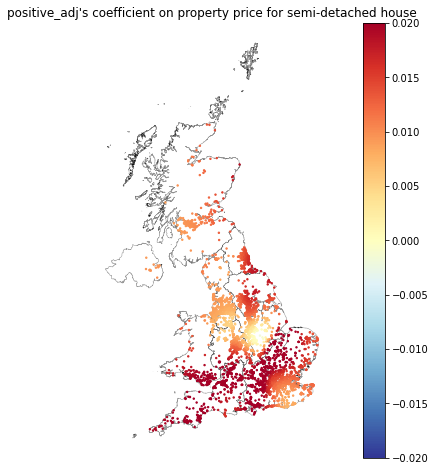

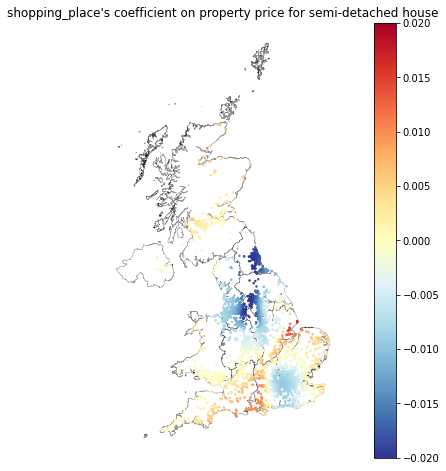

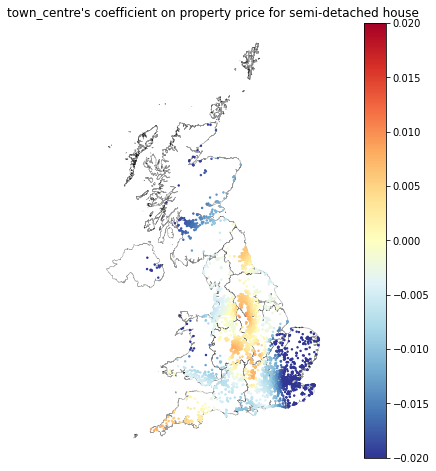

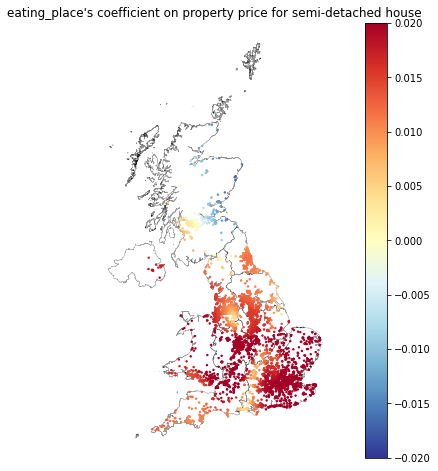

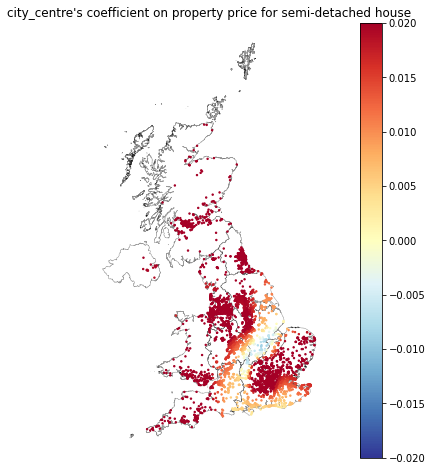

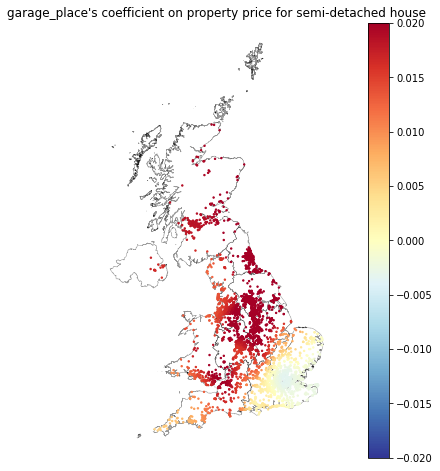

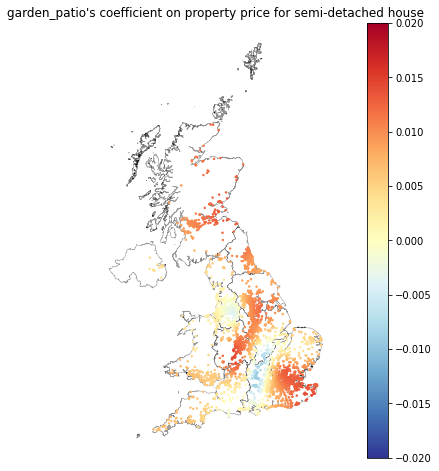

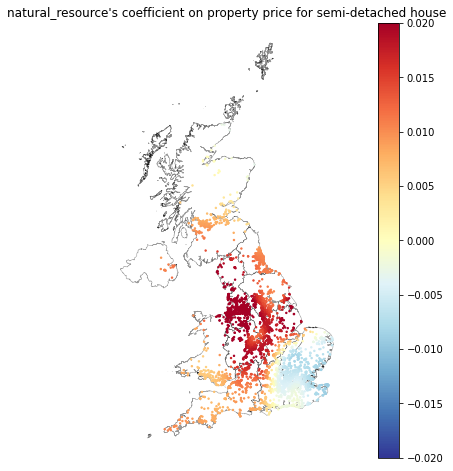

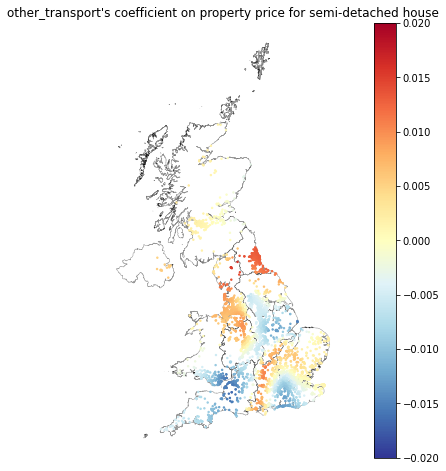

In [45]:
for i in list_toplot:
    plot_gwr_semi(UK_2019sale_month67_Semi_detached_sample_gwr_gdf,i,' semi-detached house')

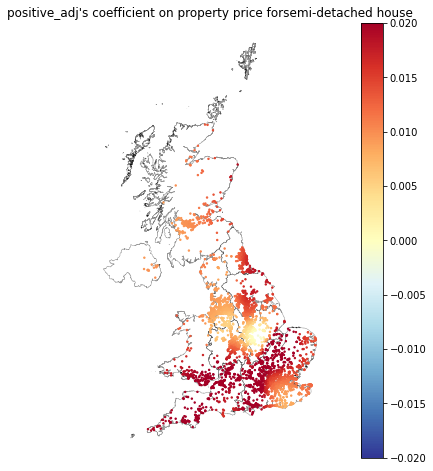

In [43]:
plot_gwr_semi(UK_2019sale_month67_Semi_detached_sample_gwr_gdf,'gwr_positive_adj',' semi-detached house')

In [ ]:
i,j=0,0
PLOTS_PER_ROW = 5
fig, axs = plt.subplots(math.ceil(len(df.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 60))
for col in df.columns:
    axs[i][j].scatter(df['target_col'], df[col], s=3)
    axs[i][j].set_ylabel(col)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
plt.show()

# Flat

In [22]:
UK_2019sale_month67_Flat = pd.read_csv('data_propertytype/property_type_Flat.csv')

In [23]:
table_tfidf_Flat = find_text_feature(UK_2019sale_month67_Flat)

In [97]:
table_tfidf_Flat.sum().sort_values(ascending=False).index.tolist()

['positive_adj',
 'heating_equipment',
 'garden_patio',
 'lounge',
 'good_size',
 'communal',
 'modern',
 'bathroom_equipment',
 'natural_resource',
 'kitchen_equipment',
 'other_transport',
 'park',
 'shopping_place',
 'parking_area',
 'balcony',
 'city',
 'open_plan',
 'eating_place',
 'underground',
 'london',
 'ceiling_light',
 'school',
 'town_centre',
 'town',
 'enjoy',
 'cupboard',
 'carpet',
 'garage_place',
 'laminate_flooring',
 'tile',
 'walk',
 'reception_room',
 'city_centre',
 'contemporary',
 'top_floor',
 'extractor_fan',
 'bright',
 'wardrobe',
 'lease',
 'service_charge',
 'court',
 'stylish',
 'local_amenity',
 'storage_heater',
 'central',
 'apartment_situate',
 'investment',
 'luxury',
 'apartment_locate',
 'terrace',
 'small',
 'heater',
 'design',
 'purpose_build',
 'entrance_hallway',
 'allocate_parking',
 'style',
 'open_plan_live',
 'ground_rent',
 'tile_flooring',
 'lift',
 'communal_entrance',
 'leasehold',
 'boiler',
 'south',
 'ample',
 'french_door',
 'no

In [24]:
list_useless_Flat = [ 'set_within','minute', 'short_walk',
 'site', 'residential',
 'onward_chain','din','upper']

In [124]:
lasso_train_test_propertytype_1(list_useless_Flat,table_tfidf_Flat,UK_2019sale_month67_Flat)

R2 on the training data:  0.0
RMSE on the training data:  0.7956924089490605
R2 on the test data:  -0.00015453370963736113
RMSE on the test data:  0.7879165254925888


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [130]:
lasso_train_test_propertytype_1_test(list_useless_Flat,table_tfidf_Flat,UK_2019sale_month67_Flat)

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.6403520385083892
RMSE on the training data:  0.47718195963428767
R2 on the test data:  0.6319981679653967
RMSE on the test data:  0.4779380922631995


In [126]:
lasso_train_test_propertytype_2(list_useless_Flat,table_tfidf_Flat,UK_2019sale_month67_Flat)

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.7939545001958548
RMSE on the training data:  0.3611825681250763
R2 on the test data:  0.7730534680070009
RMSE on the test data:  0.37532581009633637


F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the training data:  0.8228572578550146
RMSE on the training data:  0.3348936373409216
R2 on the test data:  0.8052120841472643
RMSE on the test data:  0.3477183905401576


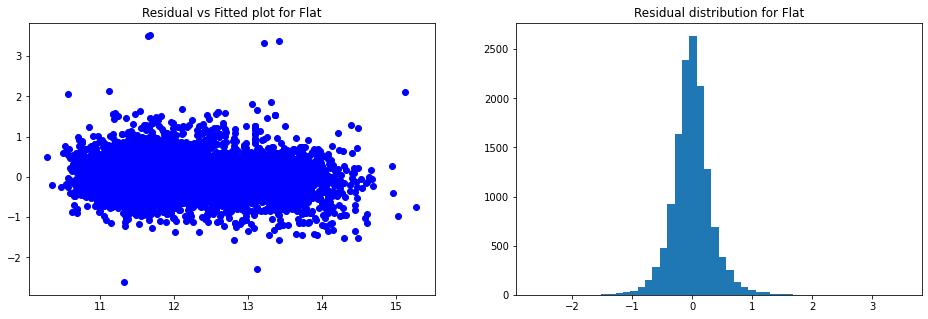

In [183]:
lasso_train_test_propertytype_3(list_useless_Flat,table_tfidf_Flat,UK_2019sale_month67_Flat,'Flat')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
<ipython-input-105-7d21081ed75d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coef_lasso_all_text['coef_abs'] = df_coef_lasso_all_text.coef.abs()


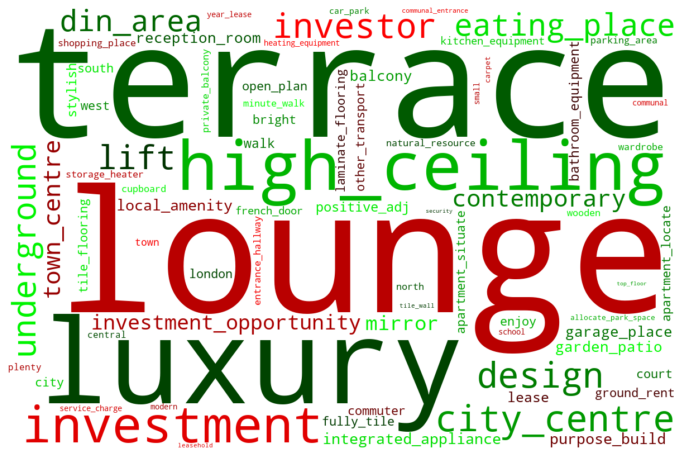

In [108]:
lasso_and_plot_proprertytype(list_useless_Flat,table_tfidf_Flat,UK_2019sale_month67_Flat,'Flat')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


lasso_model.score:  0.7145683244742245
R2 on all data:  0.7145683244742245
RMSE on all data:  0.4226056523576964


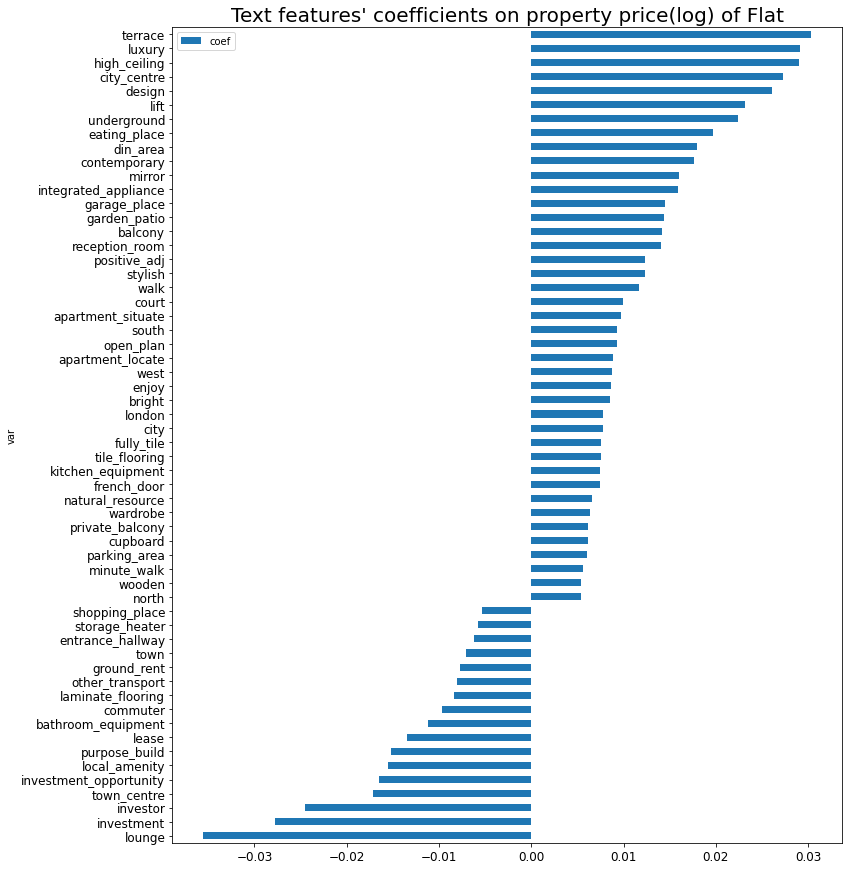

In [25]:
lasso_and_plot_proprertytype(list_useless_Flat,table_tfidf_Flat,UK_2019sale_month67_Flat,'Flat')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


lasso_model.score:  0.7145683244742245
R2 on all data:  0.7145683244742245
RMSE on all data:  0.4226056523576964


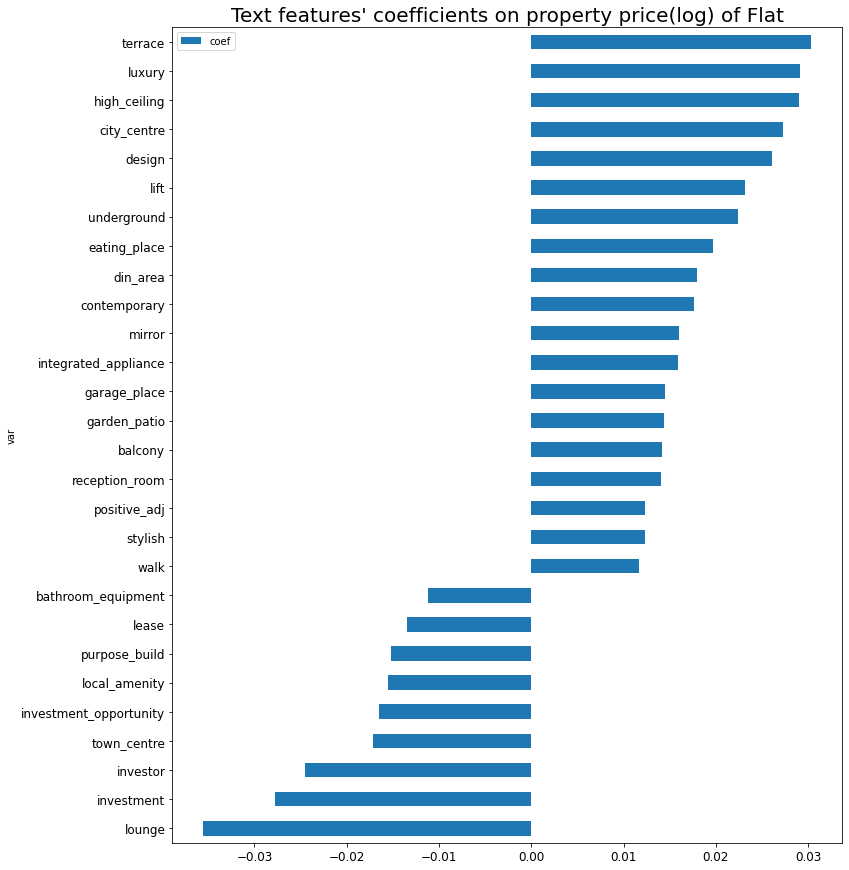

In [32]:
lasso_and_plot_proprertytype(list_useless_Flat,table_tfidf_Flat,UK_2019sale_month67_Flat,'Flat')

In [61]:
text_feature_flat = table_tfidf_Flat.drop(columns=list_useless_Flat)
flat_concatenated = pd.concat([UK_2019sale_month67_Flat, text_feature_flat], axis=1)

In [64]:
#type_concatenated = pd.get_dummies(type_concatenated,columns=['property_type'])
list_region = [i for i in flat_concatenated.columns.values.tolist() if 'nuts118nm_' in i]
list_region.remove('nuts118nm_North East (England)')
    
X_lasso_flat = flat_concatenated[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max','len_description']
       +list_region+text_feature_flat.columns.values.tolist()]
X_lasso_flat = sm.add_constant(X_lasso_flat)
Y_lasso_flat = flat_concatenated['log_price_last']
    

In [65]:
X_lasso_flat.shape

(34459, 111)

In [67]:
list_alphas = [0.000001,0.00001,0.0001,.001,.01,.1,1,10]
start_time = time.time()
lasso_cv_flat = LassoCV(cv=10, alphas=list_alphas).fit(X_lasso_flat,Y_lasso_flat)
fit_time = time.time() - start_time

In [122]:
lasso_cv.alpha_

0.01

In [68]:
# increase the max_iter to guarantee convergence
#lasso_model = sklearn.linear_model.Lasso(normalize=True, alpha = 0.01)
lasso_cv_flat.fit(X=X_lasso_flat, y=Y_lasso_flat)
pred_Y_lasso_flat = lasso_cv_flat.predict(X_lasso_flat)
print('lasso_model.score: ',lasso_cv_flat.score(X_lasso_flat, Y_lasso_flat))
    
print('R2: ',r2_score(Y_lasso_flat, pred_Y_lasso_flat))
print('RMSE: ',mean_squared_error(Y_lasso_flat,pred_Y_lasso_flat,squared=False))

lasso_model.score:  0.7145683244742245
R2:  0.7145683244742245
RMSE:  0.4226056523576964


In [69]:
flat_concatenated['residual'] = pred_Y_lasso_flat - Y_lasso_flat

In [70]:
flat_concatenated

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,listing_id,start_date,end_date,price_last,price_flag,num_bed_last,...,underground,walk,wardrobe,west,white_suite,wood,wooden,work,year_lease,residual
0,1,1,1,1,51740789,2019-06-19,2019-07-06,62000,1,2,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.050487
1,2,2,2,2,52216410,2019-07-27,2019-10-31,195000,2,2,...,0.0,3.228767,0.000000,0.0,0.000000,4.291378,0.0,0.0,0.0,-0.174248
2,3,3,3,3,51989870,2019-07-06,2019-10-10,60000,1,2,...,0.0,0.000000,3.638419,0.0,0.000000,0.000000,0.0,0.0,0.0,0.207241
3,7,7,7,7,51670293,2019-06-06,2020-03-31,155000,2,2,...,0.0,0.000000,0.000000,0.0,4.227181,4.291378,0.0,0.0,0.0,0.260205
4,8,8,8,8,51540090,2019-07-18,2019-07-25,65000,1,1,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,-0.071554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34454,186439,186439,186439,186439,51895734,2019-06-27,2019-12-05,195000,1,2,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,-0.315272
34455,186445,186445,186445,186445,51744320,2019-06-19,2020-01-21,239950,3,3,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,-0.412843
34456,186446,186446,186446,186446,51953677,2019-07-03,2020-03-12,180000,2,2,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,-0.233075
34457,186456,186456,186456,186456,51658752,2019-06-05,2019-07-04,78000,2,1,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,-0.216104


In [72]:
# plot residual
flat_concatenated_gdf = gpd.GeoDataFrame(flat_concatenated,geometry=gpd.points_from_xy(flat_concatenated.lon, flat_concatenated.lat_left,crs='epsg:4326'))
#UK_2019sale_month67_Semi_detached_sample_gwr_gdf = gpd.GeoDataFrame(UK_2019sale_month67_Semi_detached_sample_gwr, geometry=gpd.points_from_xy(UK_2019sale_month67_Semi_detached_sample_gwr.lon, UK_2019sale_month67_Semi_detached_sample_gwr.lat_left,crs='epsg:4326'))
flat_concatenated_gdf = flat_concatenated_gdf.to_crs('epsg:27700')

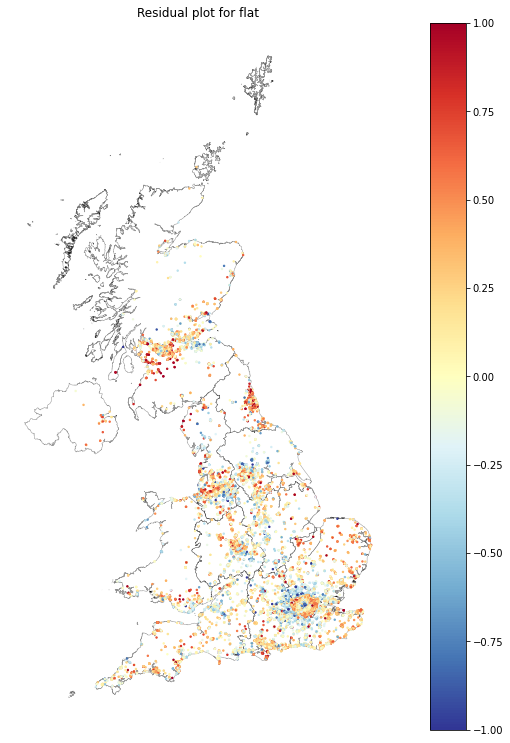

In [114]:
plot_residual(flat_concatenated_gdf,'flat')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


lasso_model.score:  0.7145683244742245
R2 on all data:  0.7145683244742245
RMSE on all data:  0.4226056523576964


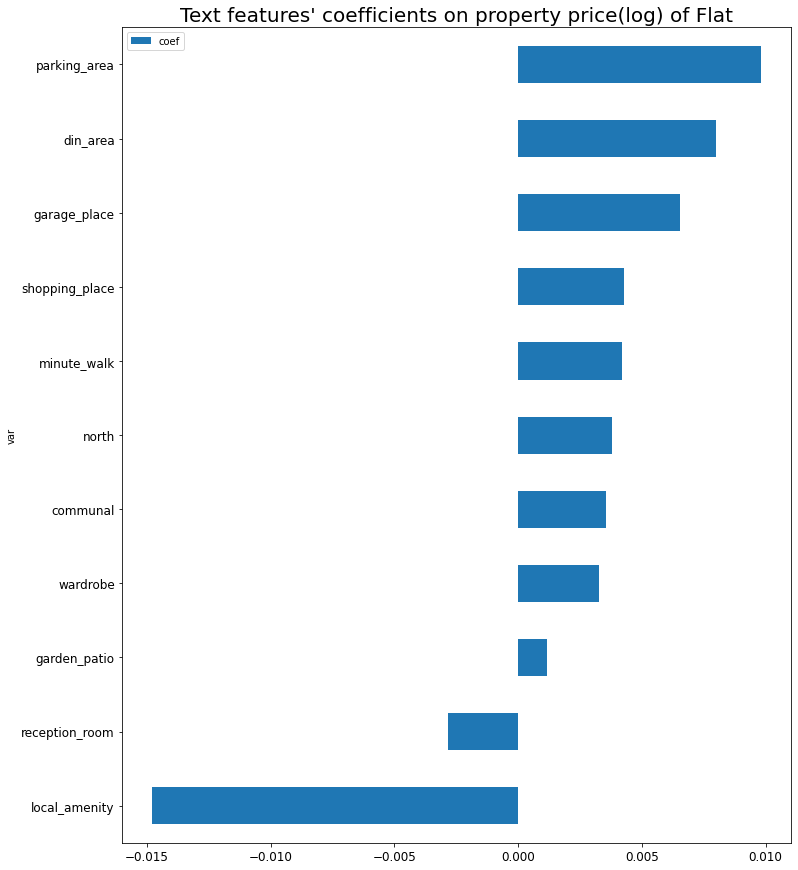

In [100]:
lasso_and_plot_proprertytype(list_useless_Flat,table_tfidf_Flat,UK_2019sale_month67_Flat,'Flat')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


lasso_model.score:  0.7145683244742245
R2 on all data:  0.7145683244742245
RMSE on all data:  0.4226056523576964


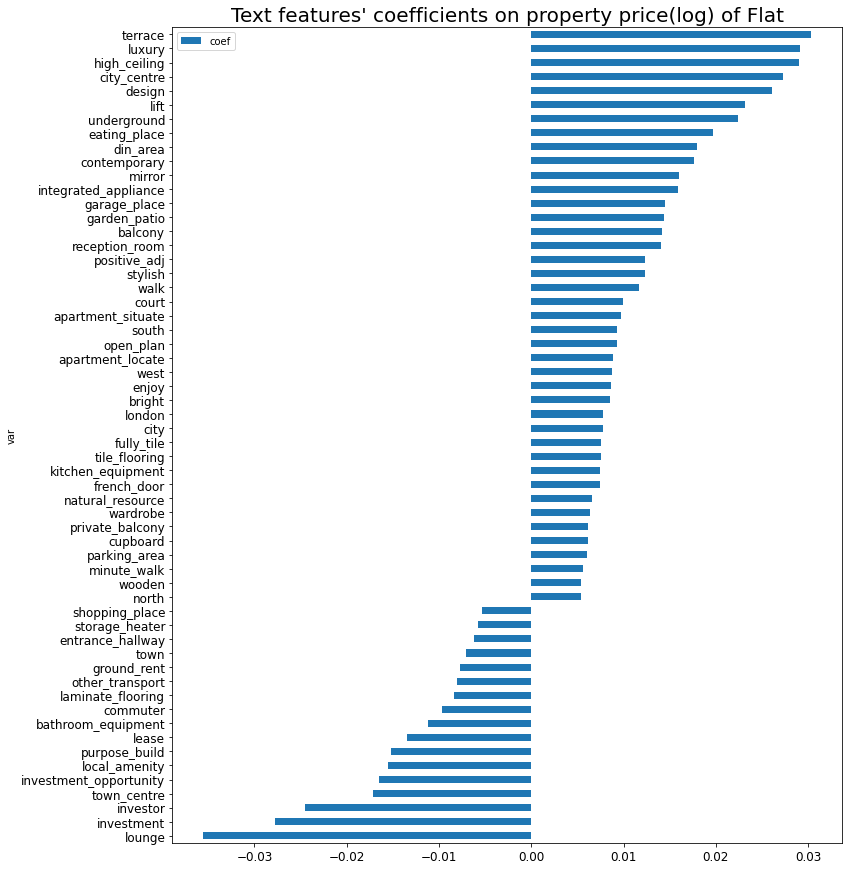

In [118]:
lasso_and_plot_proprertytype(list_useless_Flat,table_tfidf_Flat,UK_2019sale_month67_Flat,'Flat')

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


lasso_model.score:  0.7145683244742245
R2 on all data:  0.7145683244742245
RMSE on all data:  0.4226056523576964


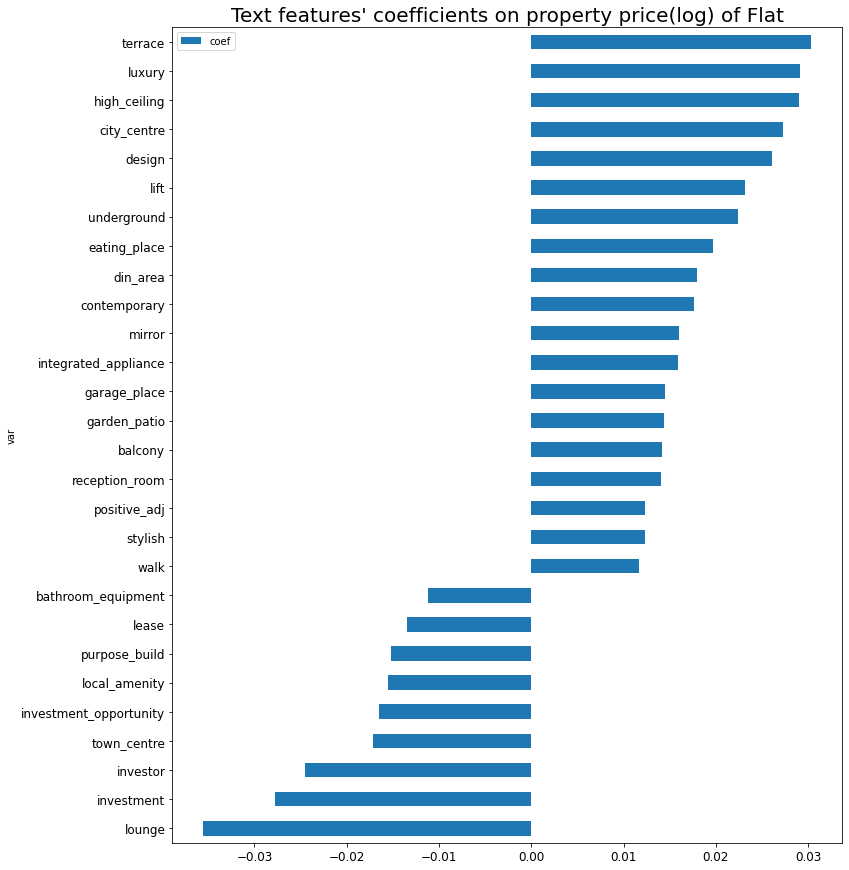

In [29]:
lasso_and_plot_proprertytype(list_useless_Flat,table_tfidf_Flat,UK_2019sale_month67_Flat,'Flat')

In [ ]:
text_feature_type = table_tfidf.drop(columns=list_useless_Semi_detached)
Semi_detached_concatenated = pd.concat([UK_2019sale_month67_Semi_detached, text_feature_Semi_detached], axis=1)
#type_concatenated = pd.get_dummies(type_concatenated,columns=['property_type'])
list_region = [i for i in Semi_detached_concatenated.columns.values.tolist() if 'nuts118nm_' in i]
list_region.remove('nuts118nm_North East (England)')
    
X_lasso_all = Semi_detached_concatenated[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max','len_description']
       +list_region+text_feature_Semi_detached.columns.values.tolist()]
X_lasso_all = sm.add_constant(X_lasso_all)
Y_lasso_all = Semi_detached_concatenated['log_price_last']   

## GWR

In [104]:
def gwr_prepare(list_useless_type, table_tfidf, UK_2019sale_month67_type):
    text_feature_type = table_tfidf.drop(columns=list_useless_type)
    type_concatenated = pd.concat([UK_2019sale_month67_type, text_feature_type], axis=1)
    #type_concatenated = pd.get_dummies(type_concatenated,columns=['property_type'])
#     list_region = [i for i in type_concatenated.columns.values.tolist() if 'nuts118nm_' in i]
#     list_region.remove('nuts118nm_North East (England)')
    
    type_concatenated_sample = type_concatenated.sample(5000,random_state=42)
    #type_concatenated_sample = type_concatenated
    
    Y_gwr_values_type = type_concatenated_sample['log_price_last'].values.reshape((-1,1))
    X_gwr_type = type_concatenated_sample[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max','len_description']
       +text_feature_type.columns.values.tolist()]
    X_gwr_type_values = X_gwr_type.values
    
    coords_type = list(zip(type_concatenated_sample.lon,type_concatenated_sample.lat_left))
    
    return type_concatenated_sample,X_gwr_type,X_gwr_type_values, Y_gwr_values_type, coords_type
    
    
    

In [105]:
flat_concatenated_sample,X_gwr_flat_table,X_gwr_flat, Y_gwr_flat, coords_flat = gwr_prepare(list_useless_Flat,table_tfidf_Flat,UK_2019sale_month67_Flat)

In [106]:
X_gwr_flat.shape

(5000, 99)

In [107]:
len(coords_flat)

5000

In [102]:
%%time
gwr_selector_flat = Sel_BW(coords_flat, Y_gwr_flat, X_gwr_flat)

Wall time: 14 ms


In [278]:
%%time
gwr_bw_flat = gwr_selector_flat.search()

LinAlgError: Matrix is singular.

In [108]:
%%time
gwr_results_flat = GWR(coords_flat, Y_gwr_flat, X_gwr_flat, 1481).fit()
gwr_results_flat.summary()

Model type                                                         Gaussian
Number of observations:                                                5000
Number of covariates:                                                   100

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           1602.292
Log-likelihood:                                                   -4249.685
AIC:                                                               8699.371
AICc:                                                              8705.577
BIC:                                                             -40131.955
R2:                                                                   0.478
Adj. R2:                                                              0.468

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [85]:
X_gwr_flat

array([[1.        , 2.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 2.        , 1.        , ..., 0.        , 4.16892557,
        0.        ],
       [2.        , 2.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [2.        , 2.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 3.        , 1.        , ..., 0.        , 4.16892557,
        0.        ],
       [3.        , 3.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [109]:
residuals_gwr_flat = gwr_results_flat.resid_response

In [110]:
residuals_gwr_flat

array([ 0.02304176, -0.09102061,  0.22377976, ...,  0.20586186,
        0.22979865, -0.17723376])

In [112]:
UK_2019sale_month67_flat_sample_gwr_gdf.to_file('data_propertytype/Flat_sample_gwr_0808.shp')

In [89]:
UK_2019sale_month67_flat_sample_gwr_gdf = gpd.read_file('data_propertytype/Flat_sample_gwr.shp')

In [92]:
UK_2019sale_month67_flat_sample_gwr_gdf['residual'] = residuals_gwr_flat

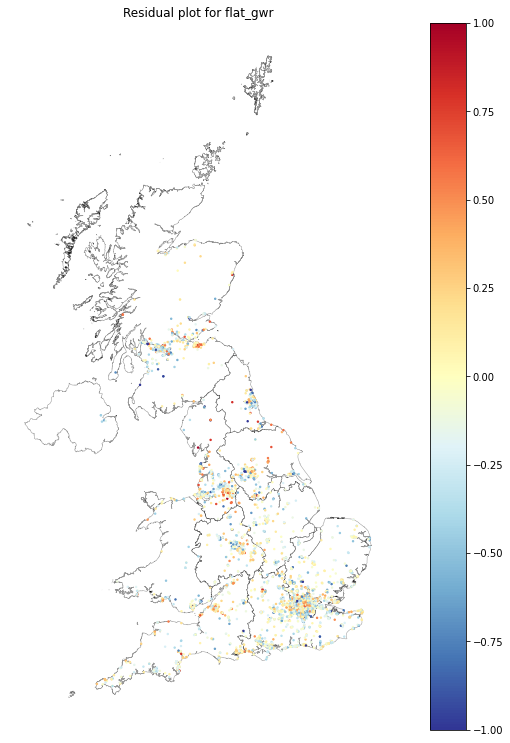

In [113]:
plot_residual(UK_2019sale_month67_flat_sample_gwr_gdf,'flat_gwr')

In [131]:
flat_concatenated_sample = flat_concatenated_sample.reset_index()

In [288]:
# As reference, here is the (average) R2, AIC, and AICc
print('Mean R2 =', gwr_results_flat.R2)
print('AIC =', gwr_results_flat.aic)
print('AICc =', gwr_results_flat.aicc)

Mean R2 = 0.8047731467776794
AIC = 5452.912565614646
AICc = 5882.003960028791


In [128]:
gwr_variable_name_flat = []
for i in  X_gwr_flat_table.columns.values.tolist():
    gwr_variable_name_flat.append('gwr_'+i)

In [129]:
gwr_result_flat = pd.DataFrame(gwr_results_flat.params,columns=['intercept']+gwr_variable_name_flat)

In [130]:
gwr_result_flat

,intercept,gwr_price_flag,gwr_num_bed_last,gwr_bed_flag,gwr_num_floors_max,gwr_num_bath_max,gwr_num_reception_max,gwr_len_description,gwr_allocate_park_space,gwr_allocate_parking,...,gwr_town_centre,gwr_underground,gwr_walk,gwr_wardrobe,gwr_west,gwr_white_suite,gwr_wood,gwr_wooden,gwr_work,gwr_year_lease
0,11.629561,-0.026638,0.314765,-0.033982,0.038352,0.110299,-0.072335,-0.000616,0.009761,0.016329,...,0.008586,0.078396,0.031252,0.006910,0.007918,0.003382,-0.014195,-0.001776,0.014571,-0.000036
1,10.252186,-0.049376,0.161402,0.683383,-0.117385,0.242598,0.036308,-0.000160,0.010831,-0.003098,...,-0.046215,0.041598,0.028135,0.008379,0.003480,-0.009563,0.012152,-0.020330,-0.014904,0.045490
2,11.682415,-0.002640,0.294655,-0.184167,0.243811,0.100728,-0.079313,-0.000385,0.007228,0.019913,...,0.001080,0.018919,0.022164,-0.003970,0.008112,0.000978,-0.002027,-0.001026,0.009985,-0.004139
3,12.265138,-0.046631,0.254250,0.230249,-0.057372,0.256823,-0.099063,-0.000895,-0.055726,-0.002865,...,-0.034864,0.024101,0.015089,-0.017700,0.024152,0.010352,0.003822,0.007162,-0.011116,-0.023408
4,11.612314,0.008734,0.231422,-0.139345,0.084564,0.120444,-0.036905,-0.000424,0.004792,0.020730,...,0.003680,0.033106,0.016903,0.003080,0.007174,-0.002759,0.006968,-0.001474,0.002738,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10.179992,-0.045331,0.173014,0.716761,-0.107386,0.238469,0.041915,-0.000147,0.011211,-0.004938,...,-0.046603,0.042906,0.026391,0.008444,0.002387,-0.008584,0.012708,-0.023584,-0.014167,0.040600
4996,11.553890,0.004663,0.227757,-0.215440,0.004011,0.150023,-0.067576,-0.000353,0.024281,0.014780,...,0.001056,0.024746,0.013929,0.010057,0.009030,0.003402,0.006091,-0.007002,-0.017151,-0.003570
4997,11.302296,-0.002781,0.217855,-0.099192,0.023118,0.180500,-0.035080,-0.000336,0.034981,0.016027,...,-0.000596,0.024995,0.015318,0.018611,0.016809,0.003890,0.016082,-0.010010,-0.018991,0.005160
4998,11.039547,-0.051723,0.090141,0.310879,-0.104173,0.288854,-0.102505,-0.000376,0.029311,0.000244,...,-0.002767,-0.032555,0.022893,0.014034,0.027258,-0.012146,-0.000384,0.003022,-0.003836,0.054611


In [132]:
UK_2019sale_month67_flat_sample_gwr = pd.concat([flat_concatenated_sample,gwr_result_flat],axis=1)

In [133]:
UK_2019sale_month67_flat_sample_gwr

,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,listing_id,start_date,end_date,price_last,price_flag,...,gwr_town_centre,gwr_underground,gwr_walk,gwr_wardrobe,gwr_west,gwr_white_suite,gwr_wood,gwr_wooden,gwr_work,gwr_year_lease
0,20996,129673,129673,129673,129673,52048169,2019-07-12,2019-07-17,167500,1,...,0.008586,0.078396,0.031252,0.006910,0.007918,0.003382,-0.014195,-0.001776,0.014571,-0.000036
1,1682,4596,4596,4596,4596,52016900,2019-07-09,2019-07-26,105000,1,...,-0.046215,0.041598,0.028135,0.008379,0.003480,-0.009563,0.012152,-0.020330,-0.014904,0.045490
2,8270,47500,47500,47500,47500,51765232,2019-06-19,2019-07-03,200000,2,...,0.001080,0.018919,0.022164,-0.003970,0.008112,0.000978,-0.002027,-0.001026,0.009985,-0.004139
3,21763,133835,133835,133835,133835,52060324,2019-07-12,2019-08-19,240000,2,...,-0.034864,0.024101,0.015089,-0.017700,0.024152,0.010352,0.003822,0.007162,-0.011116,-0.023408
4,10299,60557,60557,60557,60557,52012708,2019-07-09,2020-01-26,120000,3,...,0.003680,0.033106,0.016903,0.003080,0.007174,-0.002759,0.006968,-0.001474,0.002738,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1808,4873,4873,4873,4873,52223207,2019-07-27,2020-03-04,94000,1,...,-0.046603,0.042906,0.026391,0.008444,0.002387,-0.008584,0.012708,-0.023584,-0.014167,0.040600
4996,10572,62715,62715,62715,62715,52003424,2019-07-07,2019-10-26,119950,2,...,0.001056,0.024746,0.013929,0.010057,0.009030,0.003402,0.006091,-0.007002,-0.017151,-0.003570
4997,33152,171327,171327,171327,171327,52004676,2019-07-07,2020-01-27,175000,2,...,-0.000596,0.024995,0.015318,0.018611,0.016809,0.003890,0.016082,-0.010010,-0.018991,0.005160
4998,13173,78256,78256,78256,78256,51996542,2019-07-07,2019-07-12,299000,1,...,-0.002767,-0.032555,0.022893,0.014034,0.027258,-0.012146,-0.000384,0.003022,-0.003836,0.054611


In [134]:
UK_2019sale_month67_flat_sample_gwr_gdf = gpd.GeoDataFrame(UK_2019sale_month67_flat_sample_gwr, geometry=gpd.points_from_xy(UK_2019sale_month67_flat_sample_gwr.lon, UK_2019sale_month67_flat_sample_gwr.lat_left,crs='epsg:4326'))
# convert crs
UK_2019sale_month67_flat_sample_gwr_gdf = UK_2019sale_month67_flat_sample_gwr_gdf.to_crs('epsg:27700')

In [312]:
UK_2019sale_month67_flat_sample_gwr_gdf.to_file('data_propertytype/Flat_sample_gwr.shp')

<ipython-input-312-86da6abbb201>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  UK_2019sale_month67_flat_sample_gwr_gdf.to_file('data_propertytype/Flat_sample_gwr.shp')


In [136]:
UK_2019sale_month67_flat_sample_gwr_gdf_1 = gpd.read_file('data_propertytype/Flat_sample_gwr.shp')

In [137]:
UK_2019sale_month67_flat_sample_gwr_gdf_1.shape

(339, 278)

In [125]:
UK_2019sale_month67_flat_sample_gwr_gdf.columns.values

array(['index', 'Unnamed_ 0', 'Unnamed__1', 'Unnamed__2', 'Unnamed__3',
       'listing_id', 'start_date', 'end_date', 'price_last', 'price_flag',
       'num_bed_la', 'bed_flag', 'num_floors', 'num_bath_m', 'num_recept',
       'pcu', 'lon', 'lat_left', 'address', 'street_nam', 'property_n',
       'post_town', 'country', 'county', 'category', 'descriptio',
       'lad20nm', 'log_price_', 'nuts118cd', 'descript_1', 'tokens',
       'tokens_len', 'len_descri', 'bi_gram_to', 'bi_gram__1',
       'tri_gram_t', 'tri_gram_1', 'tri_gram_r', 'property_t',
       'property_1', 'property_2', 'property_3', 'property_4',
       'property_5', 'property_6', 'property_7', 'property_8',
       'property_9', 'property10', 'property11', 'property12',
       'property13', 'property14', 'property15', 'property16',
       'property17', 'property18', 'property19', 'property20',
       'property21', 'property22', 'property23', 'property24',
       'property25', 'property26', 'property27', 'property28',
   

In [140]:
UK_2019sale_month67_flat_sample_gwr_gdf.shape

(5000, 277)

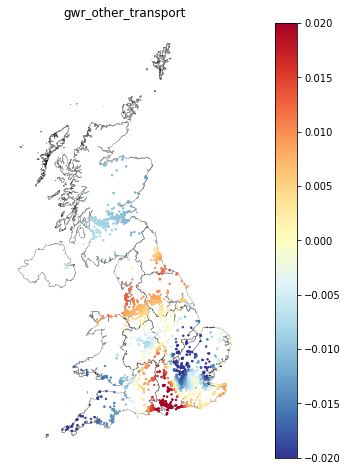

In [139]:
plot_gwr(UK_2019sale_month67_flat_sample_gwr_gdf,'gwr_other_transport')

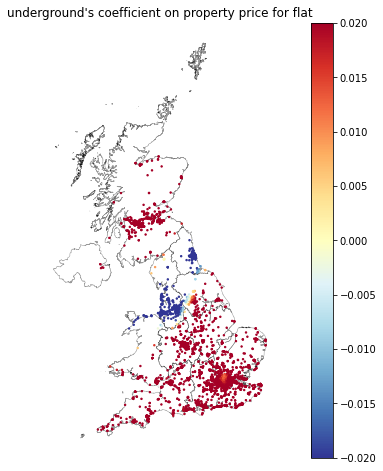

In [31]:
plot_gwr(UK_2019sale_month67_flat_sample_gwr_gdf,'gwr_underground',' flat')

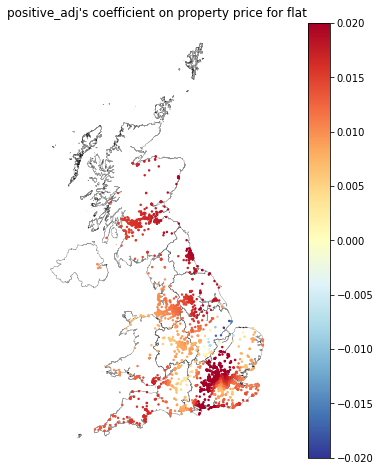

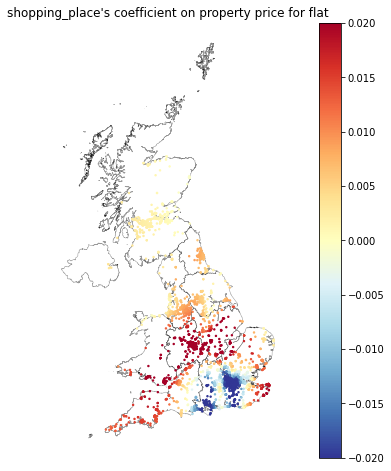

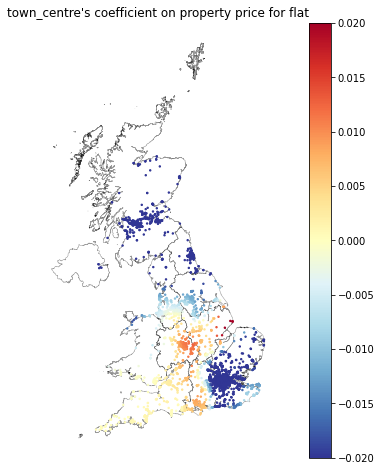

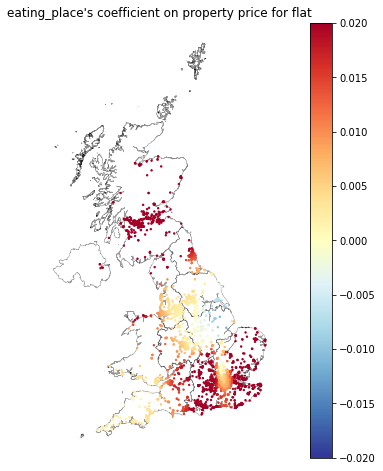

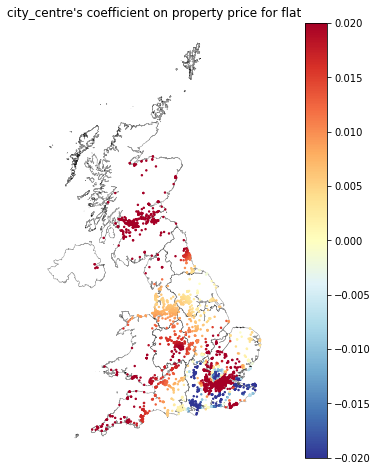

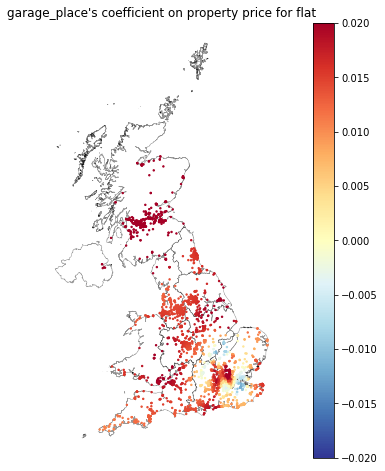

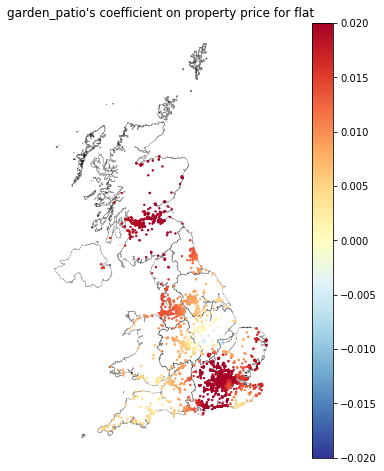

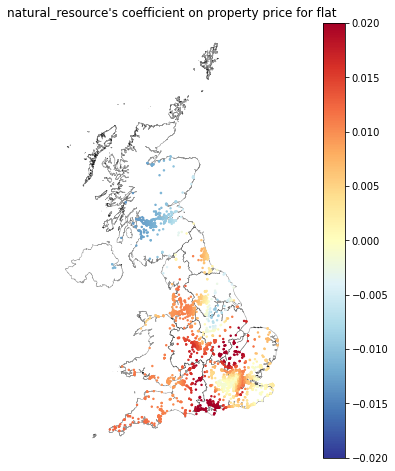

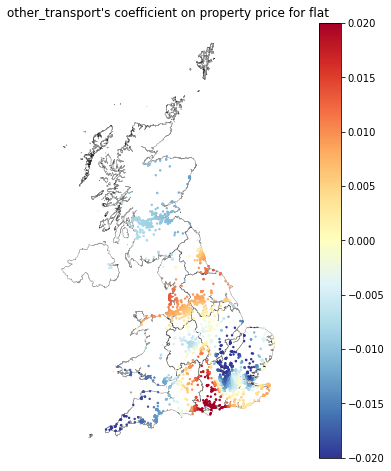

In [33]:
for i in list_toplot:
    plot_gwr(UK_2019sale_month67_flat_sample_gwr_gdf,i,' flat')

In [141]:
UK_2019sale_month67_flat_sample_gwr_gdf.to_file("UK_2019sale_month67_flat_sample_gwr_gdf.gpkg", driver="GPKG")

In [20]:
UK_2019sale_month67_flat_sample_gwr_gdf = gpd.read_file("UK_2019sale_month67_flat_sample_gwr_gdf.gpkg") 

In [144]:
UK_2019sale_month67_flat_sample_gwr_gdf_test.shape

(5000, 277)